In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

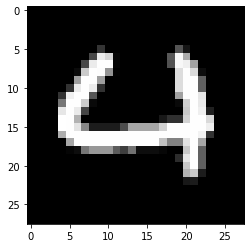

Label: 4


In [3]:
plt.imshow(x_train[60], cmap='gray')
plt.show()
print("Label:",y_train[60])

In [4]:
print(len(x_train))
print(x_train[0].shape) 

60000
(28, 28)


In [5]:
print(len(x_test))
print(x_test[0].shape)

10000
(28, 28)


In [6]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:

history = model.fit(x_train, y_train,batch_size=40, epochs=20, validation_split=0.2)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/20
1200/1200 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.9035 - val_loss: 0.1675 - val_accuracy: 0.9523
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1635 - accuracy: 0.9510 - val_loss: 0.1203 - val_accuracy: 0.9643
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1203 - accuracy: 0.9635 - val_loss: 0.0985 - val_accuracy: 0.9719
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0991 - accuracy: 0.9701 - val_loss: 0.0857 - val_accuracy: 0.9732
Epoch 5/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0822 - accuracy: 0.9741 - val_loss: 0.0846 - val_accuracy: 0.9751
Epoch 6/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.0808 - val_accuracy: 0.9758
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0618 - accuracy: 0.9805 - val_loss: 0.0827 - val_accuracy:

[0.08205309510231018, 0.9786999821662903]

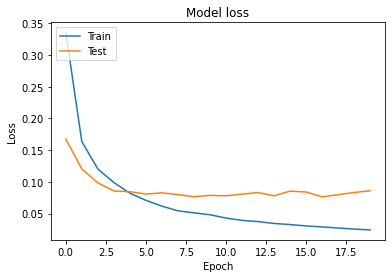

In [8]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
arr = model.predict(x_test)
result = np.argmax(arr,axis=1)
result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
err_result = []
for i in range(len(y_test)):
    if(result[i] != y_test[i]):
        err_result.append(i)
err_result

[119,
 151,
 241,
 247,
 321,
 340,
 445,
 449,
 495,
 582,
 613,
 619,
 684,
 691,
 707,
 720,
 726,
 740,
 810,
 813,
 900,
 938,
 956,
 1014,
 1112,
 1156,
 1178,
 1182,
 1192,
 1226,
 1232,
 1242,
 1247,
 1260,
 1299,
 1319,
 1328,
 1364,
 1378,
 1393,
 1500,
 1522,
 1530,
 1549,
 1553,
 1609,
 1678,
 1681,
 1709,
 1717,
 1754,
 1790,
 1850,
 1901,
 1941,
 1984,
 2004,
 2016,
 2035,
 2044,
 2053,
 2070,
 2098,
 2109,
 2118,
 2135,
 2162,
 2182,
 2189,
 2272,
 2291,
 2293,
 2299,
 2329,
 2369,
 2387,
 2406,
 2414,
 2462,
 2488,
 2514,
 2607,
 2648,
 2654,
 2771,
 2810,
 2921,
 2939,
 2953,
 3012,
 3060,
 3073,
 3117,
 3388,
 3405,
 3460,
 3490,
 3503,
 3520,
 3558,
 3567,
 3597,
 3751,
 3767,
 3796,
 3808,
 3817,
 3838,
 3853,
 3859,
 3893,
 3906,
 3943,
 3968,
 4000,
 4027,
 4065,
 4075,
 4078,
 4156,
 4163,
 4176,
 4199,
 4224,
 4248,
 4255,
 4269,
 4271,
 4289,
 4294,
 4360,
 4369,
 4419,
 4497,
 4504,
 4534,
 4536,
 4615,
 4731,
 4740,
 4751,
 4807,
 4823,
 4876,
 4880,
 4890,
 

In [12]:
np.where(y_test!=result)

(array([ 119,  151,  241,  247,  321,  340,  445,  449,  495,  582,  613,
         619,  684,  691,  707,  720,  726,  740,  810,  813,  900,  938,
         956, 1014, 1112, 1156, 1178, 1182, 1192, 1226, 1232, 1242, 1247,
        1260, 1299, 1319, 1328, 1364, 1378, 1393, 1500, 1522, 1530, 1549,
        1553, 1609, 1678, 1681, 1709, 1717, 1754, 1790, 1850, 1901, 1941,
        1984, 2004, 2016, 2035, 2044, 2053, 2070, 2098, 2109, 2118, 2135,
        2162, 2182, 2189, 2272, 2291, 2293, 2299, 2329, 2369, 2387, 2406,
        2414, 2462, 2488, 2514, 2607, 2648, 2654, 2771, 2810, 2921, 2939,
        2953, 3012, 3060, 3073, 3117, 3388, 3405, 3460, 3490, 3503, 3520,
        3558, 3567, 3597, 3751, 3767, 3796, 3808, 3817, 3838, 3853, 3859,
        3893, 3906, 3943, 3968, 4000, 4027, 4065, 4075, 4078, 4156, 4163,
        4176, 4199, 4224, 4248, 4255, 4269, 4271, 4289, 4294, 4360, 4369,
        4419, 4497, 4504, 4534, 4536, 4615, 4731, 4740, 4751, 4807, 4823,
        4876, 4880, 4890, 4956, 4966, 

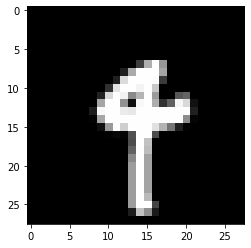

Ground Truth Label: 4
Predict Label: 9


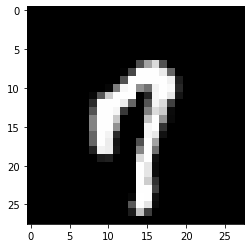

Ground Truth Label: 7
Predict Label: 9


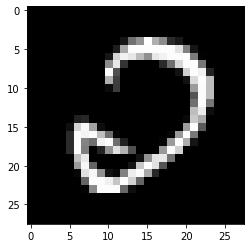

Ground Truth Label: 2
Predict Label: 0


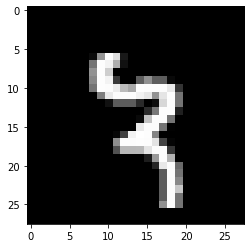

Ground Truth Label: 3
Predict Label: 7


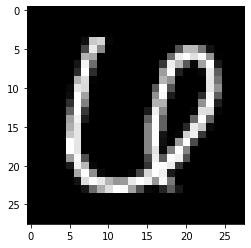

Ground Truth Label: 6
Predict Label: 0


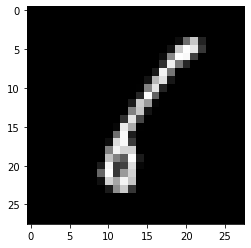

Ground Truth Label: 6
Predict Label: 1


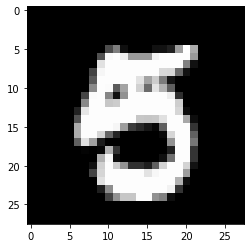

Ground Truth Label: 5
Predict Label: 8


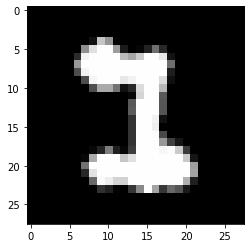

Ground Truth Label: 1
Predict Label: 2


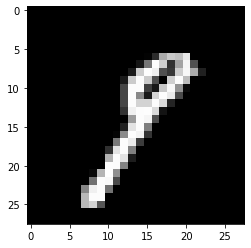

Ground Truth Label: 9
Predict Label: 1


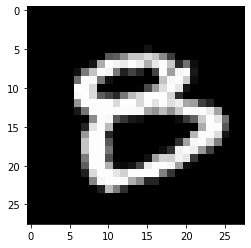

Ground Truth Label: 8
Predict Label: 0


In [14]:
idx = 47

for idx in range(60,70):
    plt.imshow(x_test[err_result[idx]], cmap='gray')
    plt.show()
    print("Ground Truth Label:",y_test[err_result[idx]])
    print("Predict Label:",result[err_result[idx]])

In [41]:
list(range(3))

[0, 1, 2]